## 1. Importing Required External & Internal Libraries

In [1]:
# Imports
import pandas as pd
import numpy as np
from IPython.core.magic import register_cell_magic

In [2]:
@register_cell_magic
def skip(line, cell):
    return

In [3]:
import sys
sys.path.append('../framework')
from framework import *

## 2. Preparing the Dataset in a Pandas DataFrame

In [4]:
item_train = pd.read_csv('./data/anime-dataset-2023.csv', delimiter=',')
item_original = item_train #Store the original anime dataset
item_train.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


### 2a. Drop labels that contain word values / unneeded features:

In [5]:
item_train = item_train.drop(columns=['English name', 'Other name', 'Synopsis', 'Type', 'Aired', 'Premiered', 'Status', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Rank', 'Popularity', 'Favorites', 'Members', 'Image URL', "Episodes"])
item_train.head()

,anime_id,Name,Score,Genres,Scored By
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",914193.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",206248.0
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",356739.0
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",42829.0
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",6413.0


### 2b. Extract Unique Genres, Compile into a List of Genres

In [6]:
# Compile all genres into a single list
genres = item_train['Genres'].str.split(', ').explode()

# Get unique genres
genres = genres.unique()

### 2c. One-Hot Encoding for Genres into the DataFrame

NOTE: The dataset contains some genres that have __sensitive / potentially sensitive content__.  I believe that AI/ML should be used in an __ethical manner__.

Therefore, __remove__ the genres that contain sensitive / possibly sensitive content. 

In [7]:
# One-Hot Encode
for genre in genres:
    item_train[genre] = item_train['Genres'].apply(lambda x: 1 if genre in x else 0) #lambda to define short function

# Remove original genre label, filter out sensitive genres
item_train = item_train[~item_train['Genres'].str.contains('Ecchi|Hentai|Erotica', case=False, na=False)] #Remove items with sensitive genres
item_train = item_train.drop(columns=["Genres", "Ecchi", "Hentai", "Erotica", "UNKNOWN"])
item_train.head()

,anime_id,Name,Score,Scored By,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,...,Sports,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love
0,1,Cowboy Bebop,8.75,914193.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,206248.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,Trigun,8.22,356739.0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,7.25,42829.0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,8,Bouken Ou Beet,6.94,6413.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Remove sensitive content from genre list
genres = genres[~np.isin(genres, ["Ecchi", "Hentai", "Erotica"])]
print(genres)


['Action' 'Award Winning' 'Sci-Fi' 'Adventure' 'Drama' 'Mystery'
 'Supernatural' 'Fantasy' 'Sports' 'Comedy' 'Romance' 'Slice of Life'
 'Suspense' 'Gourmet' 'Avant Garde' 'Horror' 'Girls Love' 'Boys Love'
 'UNKNOWN']


In [9]:
# Remove Name from item_train dataset because we don't want to feed that in the NN, just there to see the initial df
item_train = item_train.drop(columns=["Name"])

### 2d. Replace all 'UNKNOWN' values in `Scored By` and `Episodes` Columns
In addition, convert any numeric values read by the code as a String to be numeric so it can be computed.

In [10]:
# Remove `UNKNOWN` or 'NaN' values across item DataFrame
# Replace 'UNKNOWN' with NaN
item_train.replace('UNKNOWN', np.nan, inplace=True)

# Drop rows with any NaN values
item_train = item_train.dropna()

print((item_train == 'UNKNOWN').any().any())
print((item_train.isna()).any().any())

False
False


In [11]:
# Convert 'Scored By' and 'Episode' to numeric, handling non-numeric values
item_train['Scored By'] = pd.to_numeric(item_train['Scored By'], errors='coerce')
item_train['Score'] = pd.to_numeric(item_train['Score'], errors='coerce')

# Drop NaN values
item_train = item_train.dropna()

## 3. Repeat Step 2's process for the user_train

NOTE: I separated these two loading processes because user_train data is significantly larger than anime_data

In [12]:
user_train = pd.read_csv("./data/users-score-2023.csv")
user_original = user_train #Store the original dataset
user_train.head()

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


Once again, drop unnecessary features / qualitative descriptions from the dataset for user_train:

In [13]:
user_train = user_train.drop(columns=["Username", "Anime Title"])
user_train.head()

,user_id,anime_id,rating
0,1,21,9
1,1,48,7
2,1,320,5
3,1,49,8
4,1,304,8


In [14]:
# Drop UNKNOWN values in user_train to avoid numerical exceptions

# Replace 'UNKNOWN' with NaN
user_train.replace('UNKNOWN', np.nan, inplace=True)

# Drop rows with any NaN values
user_train = user_train.dropna()

print((user_train == 'UNKNOWN').any().any())

False


## 4. Comparison of One-Hot Encoded Genres vs. User Preference Rating (Weighted Average)

What we use to compare the two vectors is a weighted average of the user which will give a more accurate prediction of A's genre preference and the one-hot encoded genres. This allows us to make a prediction on how each value of the user's preference vector aligns/compares to the one-hot encoded, or genres, that exist in the anime.

### 4a. Preparation of Dataset:

#### Step 1: Apply Bayesian Average to item_train (Animes) and then Merge Datasets on anime_id
Implementing a Bayesian average of the user ratings can help reflect ratings more accurately in genre preferences.

What does a Bayesian average compute?

- Bayesian average is good for computing a kind of weighted average for ranking data based on a confidence/reliability factor
- For example, if a originally unrated item immediately gets a positive rating of 5 stars, you don't want to make it shoot up in value, as that is inaccurate since there is only 1 rating

In [15]:
# Step 1: Apply Bayesian Average
item_train = Bayesian_Rating(item_train)

We'll also load a y_train (true values) from the user's rating to train the neural network with. This allows us to compute losses (MSE).

In [16]:
print(item_train.shape)
y_train = item_train['Score'] #NOTE: The y_train score values have been adjusted by Bayesian Rating
y_original = y_train #Store for possible later use
print(y_train.shape)
y_train.head()

(13417, 22)
(13417,)


0    8.75
1    8.38
2    8.22
3    7.25
4    6.94
Name: Score, dtype: float64

In [17]:
# Step 2: Merge datasets on anime_id
merged_df = pd.merge(user_train, item_train, on="anime_id")
merged_df.head()

,user_id,anime_id,rating,Score,Scored By,Action,Award Winning,Sci-Fi,Adventure,Drama,...,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love,Bayesian Rating
0,1,21,9,8.69,1226493.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,8.633453
1,1,48,7,6.95,83009.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6.803239
2,1,49,8,7.29,26400.0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,6.814829
3,1,304,8,7.54,22479.0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,6.884763
4,1,53,7,7.11,52942.0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,6.851447


#### Step 2: Calculate Weighted Genre Scores for Each User

In [18]:
# Get the list of genre columns using `genre`
# First, mulitply each genre value by the user's rating for that anime, to give weight to the genres of that anime
genres = genres[np.where(genres != 'UNKNOWN')]
for genre_column in genres:
    merged_df[genre_column] *= merged_df['Bayesian Rating']

merged_df.head()

,user_id,anime_id,rating,Score,Scored By,Action,Award Winning,Sci-Fi,Adventure,Drama,...,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love,Bayesian Rating
0,1,21,9,8.69,1226493.0,8.633453,0.0,0.0,8.633453,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.633453
1,1,48,7,6.95,83009.0,0.000000,0.0,0.0,6.803239,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.803239
2,1,49,8,7.29,26400.0,0.000000,0.0,0.0,0.000000,0.000000,...,6.814829,6.814829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.814829
3,1,304,8,7.54,22479.0,0.000000,0.0,0.0,0.000000,0.000000,...,6.884763,6.884763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.884763
4,1,53,7,7.11,52942.0,0.000000,0.0,0.0,0.000000,6.851447,...,6.851447,6.851447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.851447


#### Step 3: Apply Weighted Average with Bayesian Ratings

In [19]:
user_genre_scores = weighted_average(merged_df, genres) # Get the user_genre_scores
user_genre_scores.head()

,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,Supernatural,Fantasy,Sports,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love
user_id,,,,,,,,,,,,,,,,,,
1,0.455527,0.162920,0.270361,0.271861,0.375676,0.098920,0.145162,0.230628,0.083922,0.308553,0.343206,0.052182,0.056303,0.004394,0.025244,0.068387,0.00000,0.000000
4,0.496301,0.041657,0.198962,0.182316,0.228620,0.146706,0.217506,0.289320,0.047691,0.254285,0.251209,0.036646,0.032047,0.011007,0.000000,0.059246,0.00000,0.011465
9,0.589355,0.103298,0.298778,0.292970,0.388257,0.038364,0.220729,0.269375,0.037815,0.406431,0.398012,0.016883,0.021840,0.000000,0.021840,0.094733,0.01740,0.000000
20,0.581567,0.211001,0.204553,0.452695,0.256600,0.108974,0.138792,0.404000,0.074852,0.201479,0.136565,0.029533,0.092503,0.008918,0.009883,0.056387,0.00000,0.000000
23,0.722485,0.062752,0.309169,0.285628,0.214324,0.125947,0.130989,0.334795,0.109190,0.188060,0.092729,0.008555,0.047092,0.000000,0.004669,0.056577,0.00369,0.000000


#### Step 4: Append Average Genre Scores to User Dataset

In [20]:
# Append the current user_items with the new inferred genre scores, without duplicating
user_train = pd.merge(user_train[['user_id']].drop_duplicates(), user_genre_scores, on='user_id') 

# Ordered list
user_train = user_train.reset_index(drop=True)
print(user_train.shape)
print(y_train.shape)
user_train.head()

(266408, 19)
(13417,)


,user_id,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,Supernatural,Fantasy,Sports,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love
0,1,0.455527,0.162920,0.270361,0.271861,0.375676,0.098920,0.145162,0.230628,0.083922,0.308553,0.343206,0.052182,0.056303,0.004394,0.025244,0.068387,0.00000,0.000000
1,4,0.496301,0.041657,0.198962,0.182316,0.228620,0.146706,0.217506,0.289320,0.047691,0.254285,0.251209,0.036646,0.032047,0.011007,0.000000,0.059246,0.00000,0.011465
2,9,0.589355,0.103298,0.298778,0.292970,0.388257,0.038364,0.220729,0.269375,0.037815,0.406431,0.398012,0.016883,0.021840,0.000000,0.021840,0.094733,0.01740,0.000000
3,20,0.581567,0.211001,0.204553,0.452695,0.256600,0.108974,0.138792,0.404000,0.074852,0.201479,0.136565,0.029533,0.092503,0.008918,0.009883,0.056387,0.00000,0.000000
4,23,0.722485,0.062752,0.309169,0.285628,0.214324,0.125947,0.130989,0.334795,0.109190,0.188060,0.092729,0.008555,0.047092,0.000000,0.004669,0.056577,0.00369,0.000000


### Step 5: Scaling of Shapes
An issue that we currently have in our dataset is that for the model to be trained on the same y_train, all trains require the same amount of examples -- this allows us to initialize parameters and spread into minibatches. Right now, m of item_train = m of y_train, but now we need it to also = m of user_train.

In [21]:
user_train = user_train[:y_train.shape[0]]
print(user_train.shape)
user_train.head()

(13417, 19)


,user_id,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,Supernatural,Fantasy,Sports,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love
0,1,0.455527,0.162920,0.270361,0.271861,0.375676,0.098920,0.145162,0.230628,0.083922,0.308553,0.343206,0.052182,0.056303,0.004394,0.025244,0.068387,0.00000,0.000000
1,4,0.496301,0.041657,0.198962,0.182316,0.228620,0.146706,0.217506,0.289320,0.047691,0.254285,0.251209,0.036646,0.032047,0.011007,0.000000,0.059246,0.00000,0.011465
2,9,0.589355,0.103298,0.298778,0.292970,0.388257,0.038364,0.220729,0.269375,0.037815,0.406431,0.398012,0.016883,0.021840,0.000000,0.021840,0.094733,0.01740,0.000000
3,20,0.581567,0.211001,0.204553,0.452695,0.256600,0.108974,0.138792,0.404000,0.074852,0.201479,0.136565,0.029533,0.092503,0.008918,0.009883,0.056387,0.00000,0.000000
4,23,0.722485,0.062752,0.309169,0.285628,0.214324,0.125947,0.130989,0.334795,0.109190,0.188060,0.092729,0.008555,0.047092,0.000000,0.004669,0.056577,0.00369,0.000000


#### Step 6: Normalization of `item_train`, `user_train`, and `y_train` Values
The item_train and user_train will be scaled using a self-implemented z-score normalization.

The y_train will be scaled using a self-implemented MinMaxScaler.

In [22]:
item_train, item_mean, item_std = pd_zscore_normalization(item_train, genres)
item_prepared = item_train #Store to use later
item_train.head()

,anime_id,Score,Scored By,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,Supernatural,...,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love,Bayesian Rating
0,1,8.75,914193.0,1.625656,7.891964,2.199590,-0.487792,-0.430144,-0.240385,-0.300604,...,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809,8.672792
1,5,8.38,206248.0,1.625656,-0.126702,2.199590,-0.487792,-0.430144,-0.240385,-0.300604,...,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809,8.121304
2,6,8.22,356739.0,1.625656,-0.126702,2.199590,2.049900,-0.430144,-0.240385,-0.300604,...,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809,8.074531
3,7,7.25,42829.0,1.625656,-0.126702,-0.454596,-0.487792,2.324628,4.159680,3.326383,...,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809,6.897099
4,8,6.94,6413.0,-0.615090,-0.126702,-0.454596,2.049900,-0.430144,-0.240385,3.326383,...,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809,6.502968


In [23]:
user_train, user_mean, user_std = pd_zscore_normalization(user_train, genres)
user_prepared = user_train
user_train.head()

,user_id,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,Supernatural,Fantasy,Sports,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love
0,1,-0.218699,0.286169,0.166576,-0.340184,0.211512,-0.086889,-0.242899,-0.520536,0.844791,-0.082326,0.328606,0.282838,-0.036345,0.038751,0.065598,0.068290,-0.266963,-0.194313
1,4,-0.047470,-0.604336,-0.214724,-0.721189,-0.540433,0.291871,0.215576,-0.266379,0.318398,-0.354281,-0.120758,0.036120,-0.253774,0.387064,-0.395568,-0.029824,-0.266963,0.022785
2,9,0.343304,-0.151673,0.318331,-0.250367,0.275840,-0.566862,0.235998,-0.352748,0.174901,0.408170,0.596311,-0.277751,-0.345268,-0.192687,0.003428,0.351094,0.296285,-0.194313
3,20,0.310600,0.639252,-0.184864,0.429252,-0.397367,-0.007198,-0.283269,0.230223,0.713022,-0.618906,-0.680745,-0.076855,0.288152,0.277025,-0.215026,-0.060519,-0.266963,-0.194313
4,23,0.902375,-0.449427,0.373826,-0.281606,-0.613534,0.127334,-0.332720,-0.069458,1.211918,-0.686156,-0.894864,-0.409999,-0.118914,-0.192687,-0.310268,-0.058470,-0.147504,-0.194313


In [24]:
# Min-Max Scaler
y_train_arr = y_train.to_numpy()
y_train_arr = y_train_arr[:, np.newaxis] #Make into 2D array
y_train_arr = MinMaxScaler(y_train_arr, -1, 1)
print(y_train_arr)

[[0.90344828]
 [0.80137931]
 [0.75724138]
 ...
 [0.16413793]
 [0.22482759]
 [0.26896552]]


Convert `item_train` and `user_train` into np arrays:

In [25]:
# Ensure we drop all unneeded values in data before training
pd.options.display.max_columns = None
item_train = item_train.drop(columns=["anime_id", "Score", "Scored By", "Bayesian Rating"])
print(item_train.shape)
item_train.head()

(13417, 18)


,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,Supernatural,Fantasy,Sports,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love
0,1.625656,7.891964,2.199590,-0.487792,-0.430144,-0.240385,-0.300604,-0.538701,-0.205168,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809
1,1.625656,-0.126702,2.199590,-0.487792,-0.430144,-0.240385,-0.300604,-0.538701,-0.205168,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809
2,1.625656,-0.126702,2.199590,2.049900,-0.430144,-0.240385,-0.300604,-0.538701,-0.205168,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809
3,1.625656,-0.126702,-0.454596,-0.487792,2.324628,4.159680,3.326383,-0.538701,-0.205168,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809
4,-0.615090,-0.126702,-0.454596,2.049900,-0.430144,-0.240385,3.326383,1.856180,-0.205168,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809


In [26]:
user_train = user_train.drop(columns=["user_id"])
print(user_train.shape)
user_train.head()

(13417, 18)


,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,Supernatural,Fantasy,Sports,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love
0,-0.218699,0.286169,0.166576,-0.340184,0.211512,-0.086889,-0.242899,-0.520536,0.844791,-0.082326,0.328606,0.282838,-0.036345,0.038751,0.065598,0.068290,-0.266963,-0.194313
1,-0.047470,-0.604336,-0.214724,-0.721189,-0.540433,0.291871,0.215576,-0.266379,0.318398,-0.354281,-0.120758,0.036120,-0.253774,0.387064,-0.395568,-0.029824,-0.266963,0.022785
2,0.343304,-0.151673,0.318331,-0.250367,0.275840,-0.566862,0.235998,-0.352748,0.174901,0.408170,0.596311,-0.277751,-0.345268,-0.192687,0.003428,0.351094,0.296285,-0.194313
3,0.310600,0.639252,-0.184864,0.429252,-0.397367,-0.007198,-0.283269,0.230223,0.713022,-0.618906,-0.680745,-0.076855,0.288152,0.277025,-0.215026,-0.060519,-0.266963,-0.194313
4,0.902375,-0.449427,0.373826,-0.281606,-0.613534,0.127334,-0.332720,-0.069458,1.211918,-0.686156,-0.894864,-0.409999,-0.118914,-0.192687,-0.310268,-0.058470,-0.147504,-0.194313


In [27]:
item_train_arr = item_train.to_numpy()

In [28]:
user_train_arr = user_train.to_numpy()

#### Part 6: Splitting into Train and Test Sets
Implemented using a self-made train_test_split function:

In [29]:
# Initial split into train (80%) and test (20%) sets
item_train_arr, item_test_arr = train_test_split(item_train_arr, train_size=0.80, random_state=1, shuffle=True)
user_train_arr, user_test_arr = train_test_split(user_train_arr, train_size=0.80, random_state=1, shuffle=True)
y_train_arr, y_test_arr       = train_test_split(y_train_arr,    train_size=0.80, random_state=1, shuffle=True)

# Split again for cv-sets (10%) and test (10%) sets
item_test_arr, item_cv_arr = train_test_split(item_test_arr, train_size=0.50, random_state=1, shuffle=True)
user_test_arr, user_cv_arr = train_test_split(user_test_arr, train_size=0.50, random_state=1, shuffle=True)
y_test_arr, y_cv_arr = train_test_split(y_test_arr, train_size=0.50, random_state=1, shuffle=True)

print(f"Item training data shape: {item_train_arr.shape}")
print(f"Item test data shape: {item_test_arr.shape}")
print(f"Item cv data shape: {item_cv_arr.shape}")

Item training data shape: (10733, 18)
Item test data shape: (1342, 18)
Item cv data shape: (1342, 18)


## 5. Building a Deep Learning Neural Network to Compute User and Item Vectors

Here, two neural networks based on the user and the item will be used to compute the properties of the user and the item. Then, by taking the dot product of these two vectors, a comparison/prediction can be made based on these two values.

The Neural Network implemented will be self made.

<figure>
    <center> <img src="./images/RecSysNN.png"   style="width:500px;height:280px;" ></center>
</figure>

In [31]:
# Checking shapes
print("Item: ", item_train_arr.shape)
print("User: ", user_train_arr.shape)

Item:  (10733, 18)
User:  (10733, 18)


In [32]:
# Get the Sequential calculation class
from Sequential import *
sequential = Sequential()

# Get Adam initialization from model
from model import init_Adam

#### Define the Model Function
The model will attempt to implement Adam optimization (inspired by Andrew Ng's DL Course) to try to speed up computational time.

The hyperparameters of choice will be:
- beta1 = 0.9 --> dW
- beta2 = 0.999 --> dW^2
- epsilon = 1 * 10^-8

<figure>
    <center> <img src="./images/Adam.png"   style="width:500px;height:280px;" ></center>
</figure>

In addition, we will introduce L2 Normalization onto the parameters. Then, a dot product of the two vectors will provide a value that points to the similarity between the two values. Then, a dot product of the two vectors will provide a value that points to the similarity (prediction) between the anime and user profiles, computing MSE loss between the prediction and the actual value.

<figure>
    <center> <img src="./images/L2Norm.png"   style="width:500px;height:280px;" ></center>
</figure>


In [33]:
# Model training imports
from model import *
from matplotlib import pyplot as plt

In [47]:
#Define the full model for Adam, basically our tf model.fit function
def RecSys_model_Adam(X_user, X_item, Y, X_user_cv, X_item_cv, Y_cv, layer_dims_user, layer_dims_item, learning_rate = 0.01, mini_batch_size = 128, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, epochs = 5000, print_cost = True, decay = None, decay_rate = 1.0, early_stopping=True, tolerance=5):
    L = len(layer_dims_user) #Number of layers in the neural network
    train_loss_history = []
    cv_loss_history = []
    t = 0. #Counter for Adam update    
    seed = 10      
    m = X_user.shape[0] #Number of training exs. X_user = X_item
    learning_rate_initial = learning_rate #Initialize the original learning rate (for decay)

    # Initialize the parameters. layer_dimensions control the input/output of the model
    params_u = init_params(layer_dims_user)
    params_i = init_params(layer_dims_item)

    # Initialize Adam optimizer (v, s dicts)
    v_u, s_u = init_Adam(params_u)
    v_i, s_i = init_Adam(params_i)

    # Initialize early stopping variables
    best_cv_loss = float('inf')
    epochs_no_improvement = 0
    true_epochs = 0

    # Optimization
    for i in range(epochs):
        
        # Define the minibatches
        seed += 1 #increment the seed so reshuffle different minibatches each time. Therefore different datasets to work with
        minibatches = create_minibatches(X_user, X_item, Y, mini_batch_size, seed)
        train_loss = 0.
        cv_loss = 0.

        # Iterate the optimization process for every minibatch
        for minibatch in minibatches:

            # Get the X and Y's from the minibatch -- remember mini-batch repesent shuffled X, Y'set
            (X_minibatch_user, X_minibatch_item, Y_minibatch) = minibatch

            params_u, v_u, s_u, params_i, v_i, s_i, y_pred, loss, t = sequential.RecSys_Sequential(
            X_minibatch_user, X_minibatch_item, Y_minibatch, params_u, params_i, v_u, v_i, s_u, s_i, t, learning_rate)

            # Adjust new parameters
            train_loss += loss 

        #Compute the avg loss over the entire training set / cv set
        avg_train_loss = train_loss / (m) 
       
        # Find CV Loss
        cv_loss = ValidationLoss(X_user_cv, X_item_cv, params_u, params_i, Y_cv, cv_loss)

        # Apply the decay function to adjust the learning_rate
        if decay:
            learning_rate = decay(learning_rate_initial, i, decay_rate)

        # Store the cost every epoch, print at every 20 epochs
        if print_cost is True and i % 20 == 0:
            print(f'Losses at epoch {i}: Train Loss: {avg_train_loss} | CV Loss: {cv_loss}')

            if decay:
                print(f'lr at epoch {i}: {learning_rate}')
            print()
        if print_cost is True:
            train_loss_history.append(avg_train_loss)
            cv_loss_history.append(cv_loss)

        # Early stopping check (if CV loss starts to increase, stop the function):
        if early_stopping is True:
            if cv_loss < best_cv_loss:
                best_cv_loss = cv_loss
                epochs_no_improvement = 0 #Reset no_improvement to zero (prevents early stopping due to minibatch oscillation)
            else:
                epochs_no_improvement += 1
            
            # Break out of the training loop if there is no more improvement, at a given tolerance value
            if epochs_no_improvement >= tolerance:
                true_epochs = i
                print(f'Epochs no longer minimizing cv loss. Best minimum found at Epoch {i-tolerance}')
                break

    # plot the cost
    plt.plot(train_loss_history, color='blue', label="Training Loss")
    plt.xticks(np.linspace(0, 375, 16))
    plt.ylim([min(train_loss_history) - 0.001, max(train_loss_history) + 0.001])
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title(f'Train Loss After {true_epochs} Epochs')
    plt.show()

    plt.plot(cv_loss_history, color="red", label='Validation Loss')
    plt.xticks(np.linspace(0, 375, 16))
    plt.ylim([min(cv_loss_history) - 0.001, max(cv_loss_history) + 0.001])
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title(f'CV Loss After {true_epochs} Epochs')
    plt.show()
    
    # Return the final optimized parameters and output layers for prediction
    return y_pred, params_u, params_i, train_loss_history, cv_loss_history

### Define the layer dimensions for the user and item


##### Chosen NN Architecture: 
- User dimensions: [user_input (18), 15, 12, 4]
- Item dimensions: [item_input (18), 15, 12, 4]

##### Chosen Epochs = 50

In [48]:
# Specify the layer dimensions (i.e. num of inputs + num of units per layer)
layer_dims_user = [user_train_arr.shape[1], 15, 12, 4]
layer_dims_item = [item_train_arr.shape[1], 15, 12, 4]

Losses at epoch 0: Train Loss: [0.00216162] | CV Loss: [0.13974104]
lr at epoch 0: 3e-07

Losses at epoch 20: Train Loss: [0.0021588] | CV Loss: [0.13939452]
lr at epoch 20: 2.941176470588235e-07

Losses at epoch 40: Train Loss: [0.00215641] | CV Loss: [0.13907399]
lr at epoch 40: 2.8846153846153846e-07

Losses at epoch 60: Train Loss: [0.00215395] | CV Loss: [0.13878754]
lr at epoch 60: 2.830188679245283e-07

Losses at epoch 80: Train Loss: [0.0021528] | CV Loss: [0.13852708]
lr at epoch 80: 2.7777777777777776e-07

Losses at epoch 100: Train Loss: [0.00215014] | CV Loss: [0.13828931]
lr at epoch 100: 2.727272727272727e-07

Losses at epoch 120: Train Loss: [0.00214834] | CV Loss: [0.13807647]
lr at epoch 120: 2.6785714285714284e-07

Losses at epoch 140: Train Loss: [0.00214669] | CV Loss: [0.13788097]
lr at epoch 140: 2.631578947368421e-07

Losses at epoch 160: Train Loss: [0.00214575] | CV Loss: [0.13770614]
lr at epoch 160: 2.586206896551724e-07

Losses at epoch 180: Train Loss: [0.0

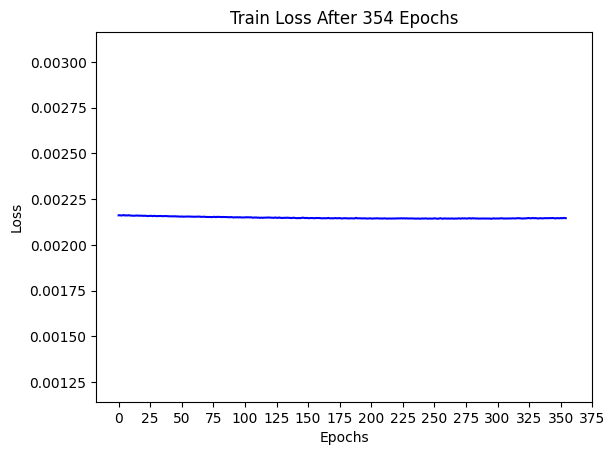

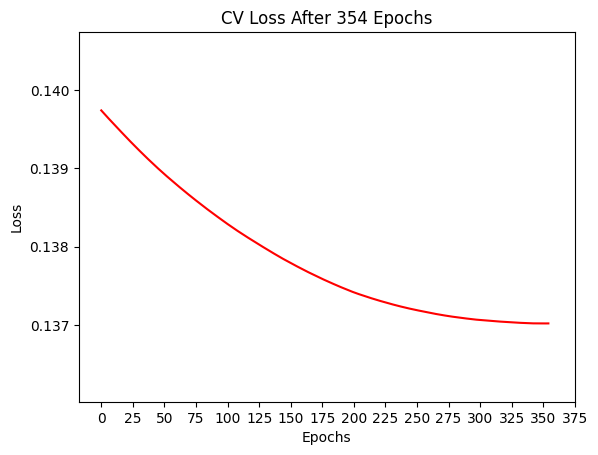

In [49]:
# Model training for Adam
prediction, user_params, item_params, train_loss_history, cv_loss_history = RecSys_model_Adam(user_train_arr, item_train_arr, y_train_arr, user_cv_arr, item_cv_arr, y_cv_arr, layer_dims_user, layer_dims_item, mini_batch_size=64, learning_rate=3e-7, epochs=1000, decay=schedule_lr_decay, decay_rate=1.0, tolerance=3)

In [50]:
print(f'Best Epoch: {np.argmin(cv_loss_history)}')
print(f'Best Minimized Loss: {np.min(cv_loss_history)}')

Best Epoch: 351
Best Minimized Loss: 0.1370189848849222


#### Storing the Trained Models
The parameters of each model is stored using `pickle`. Why not just use `.txt` files to save the user_params and item_params?

- `.pkl` serializes Python objects into a byte stream that can be easily saved to a file or transmitted over a network
- `.pkl` allows serialization of almost any data type (nparray, dict, list) while `.txt` can just store text data. Therefore when reusing, data types of objects can be retained without conversions.
- `.pkl` is stored in binary format which is faster to read/write than text formats

In [51]:
%pip install pickle
import pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Note: you may need to restart the kernel to use updated packages.


In [85]:
trained = False

if (trained == False):
    # Store the user_model parameters
    with open('./pickle/user_model.pkl', 'wb') as file:
        pickle.dump(user_params, file)

    # Store the item_model parameters
    with open('./pickle/item_model.pkl', 'wb') as file:
        pickle.dump(item_params, file)

#### Loading the Models (if required)

In [86]:
trained = True

if (trained == True):
    user_params, item_params = dict(), dict()

    # Load the user_model parameters
    with open('./pickle/user_model.pkl', 'rb') as file:
        user_params = pickle.load(file)

    # Store the item_model parameters
    with open('./pickle/item_model.pkl', 'rb') as file:
        item_params = pickle.load(file)

#### Evaluating the Model's Accuracy on Test Sets

In [89]:
from model import predict, evaluate
predictions = predict(item_test_arr, user_test_arr, user_params, item_params)
evaluate(predictions.T, y_test_arr)

for i in range(20, 40, 5):
    print(f"Predicted: {predictions[i]}, Actual: {y_test_arr[i]}")

print("Max of y_test:", np.max(y_test_arr))
print("Min of y_test:", np.min(y_test_arr))

Test Loss: [0.13211544]
Predicted: [0.55487301], Actual: [0.5337931]
Predicted: [0.9589348], Actual: [0.65517241]
Predicted: [0.79740381], Actual: [0.24965517]
Predicted: [0.98595693], Actual: [0.73241379]
Max of y_test: 0.9917241379310346
Min of y_test: -0.5724137931034483


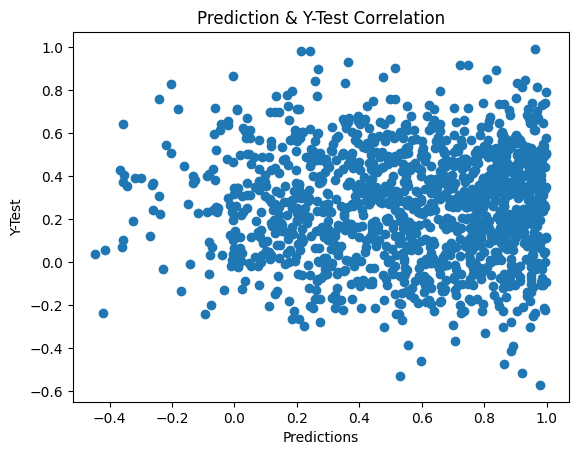

In [53]:
plt.scatter(predictions, y_test_arr)
plt.xlabel("Predictions")
plt.ylabel("Y-Test")
plt.title("Prediction & Y-Test Correlation")
plt.show()

## 6. Predictions
We can make a prediction for a new user or an existing user. Since we want to recommend animes to users based on genres they like, we are most likely going to use an algorithm to recommend to new users by having them rate genres on a scale.

To find similar items from our large catalogue, a squared distance measure between items can be used, but that would be for already existing users who have data in the catalogue. This may be a future integration to add to the model.

In [70]:
# Input test (genre ratings)
action = 0.
award_winning = 100.
sci_fi = 0.
adventure = 0.
drama = 0.
mystery = 0.
supernatural = 0.
fantasy = 0.
sports = 0.
comedy = 0.
romance = 60.
slice_of_life = 0.
suspense = 0.
gourmet = 0.
avant_garde = 0.
horror = 0.
girls_love = 0.
boys_love = 0.

user_vector = np.array([[action, 
                         award_winning, 
                         sci_fi, 
                         adventure,
                         drama,
                         mystery,
                         supernatural,
                         fantasy,
                         sports,
                         comedy,
                         romance,
                         slice_of_life,
                         suspense,
                         gourmet,
                         avant_garde,
                         horror,
                         girls_love,
                         boys_love]]) #shape (1,18), one ex

print(user_vector.shape)

(1, 18)


In [71]:
# Store genres that have been rated:

# Genre names:
genre_names = ['Action', 'Award Winning', 'Sci-Fi', 'Adventure', 'Drama',
       'Mystery', 'Supernatural', 'Fantasy', 'Sports', 'Comedy',
       'Romance', 'Slice of Life', 'Suspense', 'Gourmet',
       'Avant Garde', 'Horror', 'Girls Love', 'Boys Love']

In [72]:
# Store a list of genres that have been rated -- genre_rating > 0
preferred_genres = []

for i in range(len(user_vector.flatten())):
    genre_rating = user_vector.flatten()[i]
    if genre_rating > 0:
        preferred_genres.append(genre_names[i])

print(preferred_genres)

['Award Winning', 'Romance']


#### Store values in pickle for use in the GUI:

In [73]:
with open('pickle/item_prepared.pkl', 'wb') as file:
    pickle.dump(item_prepared, file)

with open('pickle/user_constants.pkl', 'wb') as file:
    pickle.dump([user_mean, user_std], file)

with open('pickle/item_original.pkl', 'wb') as file:
    pickle.dump(item_original, file)

with open('pickle/y_original.pkl', 'wb') as file:
    pickle.dump(y_original, file)

print(item_prepared.to_numpy().shape[0]) # num of items (animes)

13417


In [74]:
# Match the user vector to the number of movies in the dataset.
# Then we can find the closest animes by matching them
user_vecs = np.tile(user_vector.T, (item_prepared.to_numpy().shape[0])) #Transpose to prevent repetitions on original user vector
user_vecs = user_vecs.T #Transpose back
print(user_vecs.shape)

(13417, 18)


In [75]:
# Get the item vector
item_vecs = item_prepared
item_vecs = item_vecs.drop(columns=['Bayesian Rating'])
item_vecs.head()

,anime_id,Score,Scored By,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,Supernatural,Fantasy,Sports,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love
0,1,8.75,914193.0,1.625656,7.891964,2.199590,-0.487792,-0.430144,-0.240385,-0.300604,-0.538701,-0.205168,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809
1,5,8.38,206248.0,1.625656,-0.126702,2.199590,-0.487792,-0.430144,-0.240385,-0.300604,-0.538701,-0.205168,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809
2,6,8.22,356739.0,1.625656,-0.126702,2.199590,2.049900,-0.430144,-0.240385,-0.300604,-0.538701,-0.205168,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809
3,7,7.25,42829.0,1.625656,-0.126702,-0.454596,-0.487792,2.324628,4.159680,3.326383,-0.538701,-0.205168,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809
4,8,6.94,6413.0,-0.615090,-0.126702,-0.454596,2.049900,-0.430144,-0.240385,3.326383,1.856180,-0.205168,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809


In [76]:
# Scale the user vector. Note that the item vector should already be scaled
for genre in range(user_vecs.shape[1]):
    user_vecs[:, genre] = ((user_vecs[:, genre] - user_mean[genre]) / (user_std[genre]))

print(user_vecs.shape)
pd.DataFrame(user_vecs).head()

(13417, 18)


/var/folders/5d/1rtzndp93j70w52z5fn_d0kr0000gn/T/ipykernel_63856/793818024.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  user_vecs[:, genre] = ((user_vecs[:, genre] - user_mean[genre]) / (user_std[genre]))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-2.131662,733.447409,-1.27726,-1.496928,-1.709446,-0.870943,-1.162858,-1.519228,-0.374511,-1.628581,291.726091,-0.545864,-0.541047,-0.192687,-0.395568,-0.665769,-0.266963,-0.194313
1,-2.131662,733.447409,-1.27726,-1.496928,-1.709446,-0.870943,-1.162858,-1.519228,-0.374511,-1.628581,291.726091,-0.545864,-0.541047,-0.192687,-0.395568,-0.665769,-0.266963,-0.194313
2,-2.131662,733.447409,-1.27726,-1.496928,-1.709446,-0.870943,-1.162858,-1.519228,-0.374511,-1.628581,291.726091,-0.545864,-0.541047,-0.192687,-0.395568,-0.665769,-0.266963,-0.194313
3,-2.131662,733.447409,-1.27726,-1.496928,-1.709446,-0.870943,-1.162858,-1.519228,-0.374511,-1.628581,291.726091,-0.545864,-0.541047,-0.192687,-0.395568,-0.665769,-0.266963,-0.194313
4,-2.131662,733.447409,-1.27726,-1.496928,-1.709446,-0.870943,-1.162858,-1.519228,-0.374511,-1.628581,291.726091,-0.545864,-0.541047,-0.192687,-0.395568,-0.665769,-0.266963,-0.194313


In [77]:
item_vecs = item_vecs.to_numpy() # Change to np.ndarray for prediction
print(item_vecs.shape) # Note that we need to exclude the first 3 cols for prediction below

(13417, 21)


In [78]:
# Make a prediction: 
new_pred = predict(item_vecs[:, 3:], user_vecs, user_params, item_params)

In [79]:
print(min(new_pred), max(new_pred))
print(min(y_original), max(y_original))

[-0.42759926] [0.99907981]
1.85 9.1


#### Reverse scaling of predictions:

In [80]:
new_pred_unscaled = MinMaxInverse(new_pred, min(y_original), max(y_original))
print(new_pred_unscaled[:5])

[[8.78633543]
 [7.64408284]
 [7.15855988]
 [8.12299302]
 [8.77482575]]


#### Creating a dictionary of anime_id's, titles, and genres for sorting:

In [65]:
# Sort predictions and items
sorted_i = np.argsort(-new_pred_unscaled, axis=0).reshape(-1).tolist() # Negate for descending order
sorted_pred = new_pred_unscaled[sorted_i]
sorted_items = item_vecs[sorted_i]

In [81]:
# Generate the top items DataFrame by merging the sorted anime_ids in sorted_items to get their respective Names and Genres
sorted_items_df = pd.DataFrame(sorted_items, columns=['anime_id', 'Score', 'Scored By',	'Action', 'Award Winning', 'Sci-Fi', 'Adventure', 'Drama', 'Mystery', 'Supernatural', 'Fantasy', 'Sports', 'Comedy', 'Romance', 'Slice of Life', 'Suspense', 'Gourmet', 'Avant Garde', 'Horror', 'Girls Love',	'Boys Love'])
sorted_items_df['anime_id'] = sorted_items_df['anime_id'].astype(int) #Convert anime_id to int
top_items = sorted_items_df.merge(item_original[['anime_id', 'Name', 'Genres']], on='anime_id', how='left') #Merge the sorted animes with the original item dataset to get the name
top_items.head()

,anime_id,Score,Scored By,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,Supernatural,Fantasy,Sports,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love,Name,Genres
0,523,8.25,658094.0,-0.61509,7.891964,-0.454596,2.049900,-0.430144,-0.240385,3.326383,-0.538701,-0.205168,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809,Tonari no Totoro,"Adventure, Award Winning, Supernatural"
1,199,8.78,1234780.0,-0.61509,7.891964,-0.454596,2.049900,-0.430144,-0.240385,3.326383,-0.538701,-0.205168,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809,Sen to Chihiro no Kamikakushi,"Adventure, Award Winning, Supernatural"
2,34792,7.39,18624.0,-0.61509,7.891964,-0.454596,2.049900,-0.430144,-0.240385,3.326383,-0.538701,-0.205168,-0.702895,-0.357161,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809,Yoake Tsugeru Lu no Uta,"Adventure, Award Winning, Supernatural"
3,10408,8.29,443027.0,-0.61509,7.891964,-0.454596,-0.487792,2.324628,-0.240385,3.326383,-0.538701,-0.205168,-0.702895,2.799646,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809,Hotarubi no Mori e,"Award Winning, Drama, Romance, Supernatural"
4,1144,7.20,7786.0,-0.61509,-0.126702,2.199590,-0.487792,2.324628,-0.240385,-0.300604,-0.538701,-0.205168,-0.702895,2.799646,-0.306607,-0.118562,-0.086215,-0.188837,-0.177313,-0.072935,-0.088809,Tenchi Muyou! in Love 2: Harukanaru Omoi,"Drama, Romance, Sci-Fi"


In [82]:
# Get rid of the encoded genres in top_items
top_items = top_items.drop(top_items.columns[1:21], axis=1)
print(top_items.shape)
top_items.head()

(13417, 3)


,anime_id,Name,Genres
0,523,Tonari no Totoro,"Adventure, Award Winning, Supernatural"
1,199,Sen to Chihiro no Kamikakushi,"Adventure, Award Winning, Supernatural"
2,34792,Yoake Tsugeru Lu no Uta,"Adventure, Award Winning, Supernatural"
3,10408,Hotarubi no Mori e,"Award Winning, Drama, Romance, Supernatural"
4,1144,Tenchi Muyou! in Love 2: Harukanaru Omoi,"Drama, Romance, Sci-Fi"


#### Generating the Final Table of Top Recommendations
Some things to note in the code below:

- We use the if statement to ensure that the predicted item actually has at least one matching genre that the user rated in the item's genre list.
    - This can help further minimize errors during training.
- Also note that a further complicated algorithm is not needed (such as more calculations or a decision tree model) to further break this down. Because, theoretically, the trained model should already be robust enough to correctly identify good recommendations.
    - Simply trying to 'fix' error loss and inaccuracies.

In [83]:
%pip install tabulate
from tabulate import tabulate

Note: you may need to restart the kernel to use updated packages.


In [84]:
# Table generation
pred_headers = [['Predicted', 'Actual', 'anime_id', 'Anime Title', 'Genres']]

for i in range(0, 15): #Display the top 15 recommendations
    # Check if the predicted anime actually contains a genre that user has rated (likes)
    anime_genres = top_items.iloc[i]['Genres']
    genre_list = [genre.strip() for genre in anime_genres.split(',')]

    # If at least one genre the user likes is in the genre_list, we assume it's good to display on the table:

    # Iterate over preferred genres. If the genre in preferred genres is also in the genre_list, any(...) will return True.
    if any(genre in genre_list for genre in preferred_genres): 
        # Round the predictions & actual ratings
        pred_headers.append([np.around(sorted_pred[i, 0], 1),
                            np.around(sorted_items[i, 1].astype(float), 1), #Predictions on the 1st index col
                            sorted_items[i, 0].astype(int),
                            top_items.iloc[i]['Name'],
                            top_items.iloc[i]['Genres']
                            ])

print(tabulate(pred_headers, tablefmt='fancy_grid', headers='firstrow'))

╒═════════════╤══════════╤════════════╤══════════════════════════════════════════════╤═════════════════════════════════════════════╕
│   Predicted │   Actual │   anime_id │ Anime Title                                  │ Genres                                      │
╞═════════════╪══════════╪════════════╪══════════════════════════════════════════════╪═════════════════════════════════════════════╡
│         9.1 │      8.2 │        523 │ Tonari no Totoro                             │ Adventure, Award Winning, Supernatural      │
├─────────────┼──────────┼────────────┼──────────────────────────────────────────────┼─────────────────────────────────────────────┤
│         9.1 │      8.8 │        199 │ Sen to Chihiro no Kamikakushi                │ Adventure, Award Winning, Supernatural      │
├─────────────┼──────────┼────────────┼──────────────────────────────────────────────┼─────────────────────────────────────────────┤
│         9.1 │      7.4 │      34792 │ Yoake Tsugeru Lu no Uta      